# Problem 1 

## 
To load the table, we use the Python module pandas. We obtain a table where each row corresponds to a sample and each column represents a feature.

In [229]:
import pandas as pd
table = pd.read_csv('./SpotifyFeatures.csv', header=0, sep=',') # Load the table
print('Number of samples : ',table.shape[0],'\nNumber of features : ',table.shape[1]) # table.shape returns the table dimensions 

Number of samples :  232725 
Number of features :  18


## 
In order to only have the inputs of 'Pop' and 'Classical' genre, we create a new table "tablePC" from the first table that we filtered. Then we print the numbers of sample.
We can create labels for the sample by modifying the dataframe : https://python-simple.com/python-pandas/modif-dataframes.php  
And then create a third table "tablePC_Reduced" with only 3 features : 'labels','liveness','loudness'.

In [ ]:
tablePC = table[(table['genre']=='Pop')|(table['genre']=='Classical')] # New table filtered
print('Number of samples of Pop or Classical : ',tablePC.shape[0]) 

tablePC['labels'] = tablePC['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

tablePC_reduced = tablePC[['labels','liveness','loudness']]

Number of samples of Pop or Classical :  18642

##
We can divide all the data into different datasets for training and testing. Initially, I separated the Pop and Classical genres into two different datasets. For each test dataset, I created corresponding training and testing datasets. Finally, I combined the training datasets (Pop and Classical) into a single dataset, and did the same for the testing datasets. This way, I ensure that the proportions of Pop and Classical are the same in both the training and testing datasets.

In [231]:
import numpy as np
X = tablePC_reduced[['liveness', 'loudness']].values  # Features
y = tablePC_reduced['labels'].values  # Labels

X_pop = X[y == 1]
y_pop = y[y == 1]
X_classical = X[y == 0]
y_classical = y[y == 0]

train_size_pop = int(len(X_pop) * 0.8)
train_size_classical = int(len(X_classical) * 0.8)

X_train_pop = X_pop[:train_size_pop]
y_train_pop = y_pop[:train_size_pop]
X_test_pop = X_pop[train_size_pop:]
y_test_pop = y_pop[train_size_pop:]

X_train_classical = X_classical[:train_size_classical]
y_train_classical = y_classical[:train_size_classical]
X_test_classical = X_classical[train_size_classical:]
y_test_classical = y_classical[train_size_classical:]

X_train =np.concatenate((X_train_pop,X_train_classical))
X_test = np.concatenate((X_test_pop,X_test_classical))
y_train =np.concatenate((y_train_pop,y_train_classical))
y_test =np.concatenate((y_test_pop,y_test_classical))

##
Finally, we can plot the points corresponding to the samples based on their loudness and liveness.

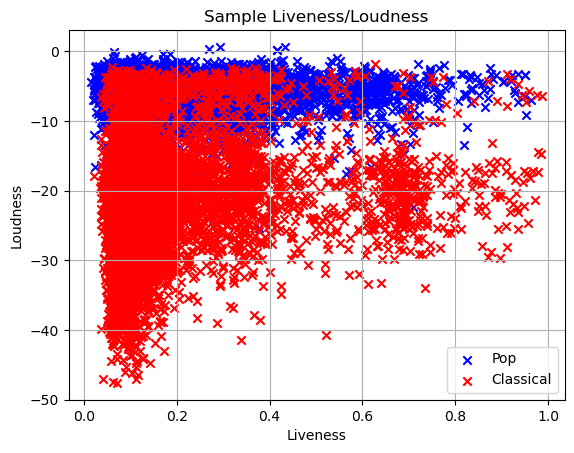

In [232]:
import matplotlib.pyplot as plt
# Scatters Pop points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Pop',marker='x')

#Scatter classical points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classical',marker='x')

# Labels and legend
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Sample Liveness/Loudness')
plt.legend()
plt.grid(True)

plt.show()

# Problem 2
To classify the songs, I will use logistic regression with stochastic gradient descent. To achieve this, we need to create a few functions discussed in the lectures:

logistic_function: This function transforms values into probabilities. This probability will be close to 1 when the model predicts a classical song and close to 0 for a pop song.  
loss_function: This function calculates the cross-entropy loss, which measures the model's performance.  
compute_gradients: This function computes the gradient of the loss function


In [233]:
import numpy as np
import random

def logistic_fonction(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y, y_pred):
    m = len(y)
    L = 0
    for i in range(m):
        yi = y[i]
        if yi == 0:
            L += -np.log(1 - y_pred[i] + 1e-10) # We add 1e-10 in order not to have infinite log
        else:
            L += -np.log(y_pred[i] + 1e-10)
    return L

def compute_gradients(X, y, y_pred):
    gradient = (X.T @ (y_pred - y))
    return gradient


Next, we define the training function, which first includes the bias in X and initializes the weights.  
Then, a loop is repeated over the number of epochs, allowing the model to predict the sample values, compute the gradient, and adjust the weights.  
Finally, the loss and accuracy are calculated.

In [234]:
def train_logistic_regression(X_train, y_train, learning_rate, num_epochs):
    
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) # We include the bias in X

    weights = np.ones(X_train.shape[1])  # weights Initialisation 

    training_errors = []  # Loss list
    training_accuracies = []  # Accuracy list

    for epoch in range(num_epochs):
        
        y_pred = logistic_fonction(X_train @ weights) # value prediction
        
        gradient = compute_gradients(X_train, y_train, y_pred) # gradient calcul
        
        weights -= learning_rate * gradient # weights update
        
        # Loss calcul
        loss = loss_function(y_train, y_pred)
        training_errors.append(loss)
        
        # Accuracy calcul
        y_pred_binary = np.round(y_pred)  # Binary prediction (0.4->0 and 0.51->1)
        accuracy = np.mean(y_pred_binary == y_train) 
        training_accuracies.append(accuracy)

    return weights, training_errors, training_accuracies

Next, we can define a test function to be called once the training is completed.

In [235]:
def predict(X, weights):
    # Includes the bias in X
    X = np.hstack([X, np.ones((X.shape[0], 1))])

    # Prediction
    y_pred = logistic_fonction(X @ weights)
    return np.round(y_pred)  # Giving labels to value => (0.4->0 and 0.51->1)

Finally, we can test the model with different learning rate parameters.

In [236]:
# Parameters
learning_rate = 0.000007
num_epochs = 200

# Training the model
weights, training_errors, training_accuracies = train_logistic_regression(X_train, y_train, learning_rate, num_epochs)

# Parameters
learning_rate = 0.000006
num_epochs = 200

# Training the model
weights1, training_errors1, training_accuracies1 = train_logistic_regression(X_train, y_train, learning_rate, num_epochs)

# Parameters
learning_rate = 0.000005
num_epochs = 200

# Training the model
weights2, training_errors2, training_accuracies2 = train_logistic_regression(X_train, y_train, learning_rate, num_epochs)


# Print final results
print("Weights :", weights)
#print("Errors on trainig:", training_errors)
print("Accuracy on training :", training_accuracies[-1])  # Accuracy at the last training epoch

# Test prediction
y_test_pred = predict(X_test, weights)

# Accuracy on test set
accuracy_test = np.mean(y_test_pred == y_test)
print(f"Accuracy on test set: {accuracy_test}")

Weights : [1.20428556 0.2570338  2.71335247]
Accuracy on training : 0.9294527896995708
Accuracy on test set: 0.8983914209115281


We can plot the loss as a function of the number of epochs and different learning rates.

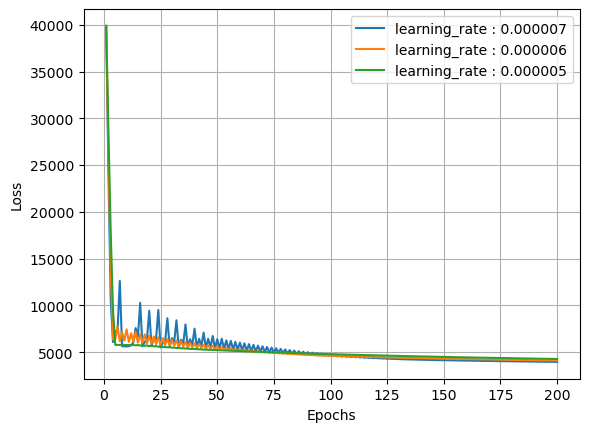

In [237]:
epochs=[]
for i in range(num_epochs):
    epochs.append(i+1)
plt.plot(epochs, training_errors,label='learning_rate : 0.000007')
plt.plot(epochs, training_errors1,label='learning_rate : 0.000006')
plt.plot(epochs, training_errors2,label='learning_rate : 0.000005')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

We notice that a high learning rate causes oscillations. A lower rate allows for more precise adjustments and a more stable but slower convergence.

Next, we can plot the decision boundary : 
w1*liveness+w2*loudness+b=0 => loudness=-(w1*liveness+b)/w2

[[  0.106   -5.29  ]
 [  0.101   -7.399 ]
 [  0.0884 -10.744 ]
 ...
 [  0.191   -5.912 ]
 [  0.638   -6.205 ]
 [  0.145   -3.869 ]]


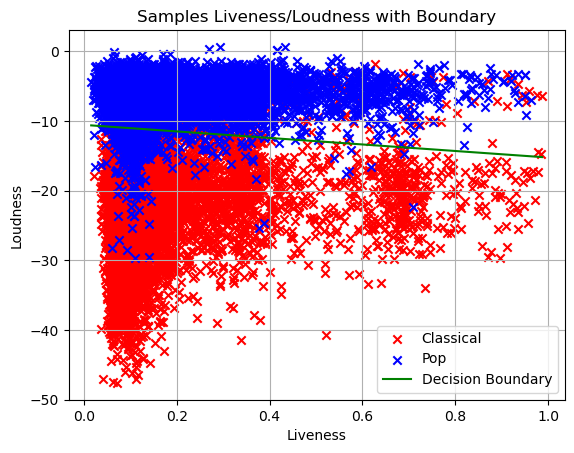

In [238]:
def plot_decision_boundary(weights, X, y):
    w1 = weights[0]  # liveness weight
    w2 = weights[1]  # loudness weight
    b = weights[2]   # bias
    
    # Decision line
    liveness = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    loudness = -(w1 * liveness + b) / w2  

    # Scatter points for Classical (0)
    plt.scatter(X_classical[:, 0], X_classical[:, 1], color='red', label='Classical',marker='x')

    # Scatter points for Pop (1)
    print(X_pop)
    plt.scatter(X_pop[:,0], X_pop[:, 1], color='blue', label='Pop',marker='x')

    # Plot decision line
    plt.plot(liveness, loudness, color='green', label='Decision Boundary')

    plt.xlabel('Liveness')
    plt.ylabel('Loudness')
    plt.title('Samples Liveness/Loudness with Boundary')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_decision_boundary(weights, X, y)

# Problem 3
We can use sklearn for the confusion matrix : 

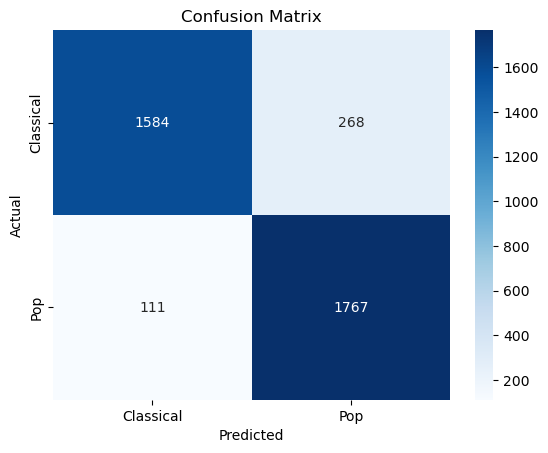

In [239]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classical', 'Pop'], yticklabels=['Classical', 'Pop'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix provides detailed information that accuracy alone doesn't offer. It shows the proportions of true positives, false positives, true negatives, and false negatives, helping to better understand the different types of errors the model is making.

Classical songs with low loudness and pop songs with very low loudness are difficult to classify because they overlap in the feature space, making it hard to distinguish between the two genres.

To suggest a classical track to a pop fan, I decide to find the classical song with the highest loudness. This is one approach, but it could be further improved by adjusting the decision boundary to identify the classical song that is most misclassified.

In [240]:
temp = tablePC_reduced[tablePC_reduced['labels'] == 0]
max_loudness = temp['loudness'].max()

index = temp[temp['loudness'] == max_loudness].index

print(table.loc[index[0], ['artist_name', 'track_name']])

artist_name    Richie Kotzen
track_name         Go Faster
Name: 127261, dtype: object
